In [1]:
 #importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
#Reading and importing the Data
car=pd.read_csv('car data.csv')

In [3]:
# Overview of DataSet
car.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [4]:
# Renaming Column Names
car=car.rename({'Present_Price':'Initial_Price','Owner':'Previous_Owners'},axis='columns')
car.head()

Car_Name  Year  Selling_Price  Initial_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Previous_Owners  
0      Dealer       Manual                0  
1      Dealer       Manual                0  
2      Dealer       Manual                0  
3      Dealer       Manual                0  
4      Dealer       Manual                0

In [5]:
# Reading the Feature Types
print("Numerical feature : ")
print(car.select_dtypes(include = "number").columns)
print("\n Categorical feature : ")
print(car.select_dtypes(exclude = "number").columns)

Numerical feature : 
Index(['Year', 'Selling_Price', 'Initial_Price', 'Kms_Driven',
       'Previous_Owners'],
      dtype='object')

 Categorical feature : 
Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')


In [6]:
#Number of rows and columns in our dataset
car.shape

(301, 9)

In [7]:
# Data Summary
car.describe()

Year  Selling_Price  Initial_Price     Kms_Driven  \
count   301.000000     301.000000     301.000000     301.000000   
mean   2013.627907       4.661296       7.628472   36947.205980   
std       2.891554       5.082812       8.644115   38886.883882   
min    2003.000000       0.100000       0.320000     500.000000   
25%    2012.000000       0.900000       1.200000   15000.000000   
50%    2014.000000       3.600000       6.400000   32000.000000   
75%    2016.000000       6.000000       9.900000   48767.000000   
max    2018.000000      35.000000      92.600000  500000.000000   

       Previous_Owners  
count       301.000000  
mean          0.043189  
std           0.247915  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           3.000000

In [8]:
# Dataset Columns
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Initial_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Previous_Owners'],
      dtype='object')

In [9]:
# Unique Values
car.nunique()

Car_Name            98
Year                16
Selling_Price      156
Initial_Price      147
Kms_Driven         206
Fuel_Type            3
Seller_Type          2
Transmission         2
Previous_Owners      3
dtype: int64

In [10]:
# Unique Values of Attributes
car['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [11]:
# Unique Values of Attributes
car['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [12]:
# Unique Values of Attributes
car['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
# Unique Values of Attributes
car['Previous_Owners'].unique()

array([0, 1, 3], dtype=int64)

In [14]:
# Dataset Information
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Name         301 non-null    object 
 1   Year             301 non-null    int64  
 2   Selling_Price    301 non-null    float64
 3   Initial_Price    301 non-null    float64
 4   Kms_Driven       301 non-null    int64  
 5   Fuel_Type        301 non-null    object 
 6   Seller_Type      301 non-null    object 
 7   Transmission     301 non-null    object 
 8   Previous_Owners  301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
# Checking Null values in Dataset
car.isnull().sum()

Car_Name           0
Year               0
Selling_Price      0
Initial_Price      0
Kms_Driven         0
Fuel_Type          0
Seller_Type        0
Transmission       0
Previous_Owners    0
dtype: int64

In [16]:
# Highest Priced Vehicle
car[car.Initial_Price == car.Initial_Price.max()][['Car_Name','Initial_Price']]

Car_Name  Initial_Price
86  land cruiser           92.6

In [17]:
# Top Selling vehicles
px.pie(data_frame = car ,names = car.Car_Name.value_counts().head(8).index,values = car.Car_Name.value_counts().values[0:8],
      title = "Top 8 vehicles for sale",hole = 0.7
      )

Text(0.5, 1.0, "Year v/s vehicle's available for sale ")

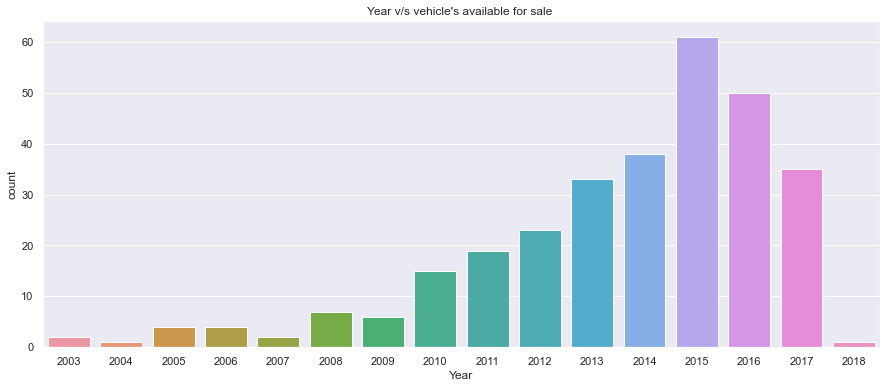

In [18]:
# Year and vehicle's count
plt.rcParams['figure.figsize'] = (15,6)
sns.countplot(x=car['Year'])
plt.title("Year v/s vehicle's available for sale ")

Text(0, 0.5, 'Price')

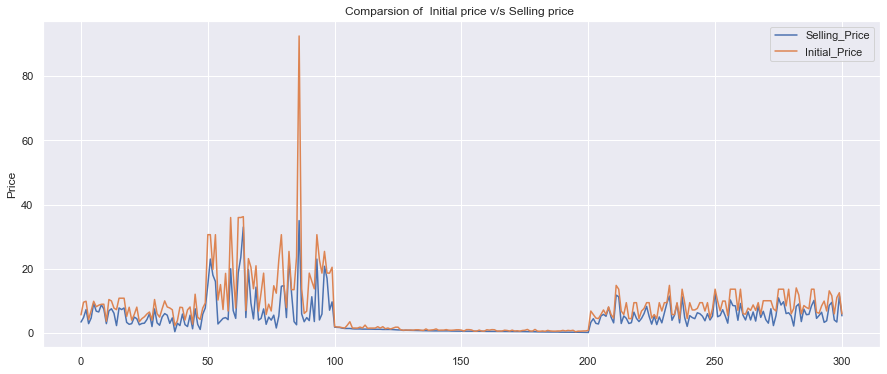

In [19]:
# Initial Price and Selling Price Comparison
car[["Selling_Price","Initial_Price"]].plot(kind = 'line')
plt.title("Comparsion of  Initial price v/s Selling price ")
plt.ylabel("Price")

In [20]:
# Fuel Type Analysis
px.pie(data_frame = car ,names = car.Fuel_Type.value_counts().index,values = car.Fuel_Type.value_counts().values,
      title = "Vehicle Fuel type " ,hole = 0.7)

In [21]:
# Vehicle Transmission Type Analysis
px.pie(data_frame = car ,names = car.Transmission.value_counts().index,values = car.Transmission.value_counts().values,
      title = "Vehicle Transmission type " ,hole = 0.7
      )

Text(0.5, 1.0, 'Count of Seller Types as Dealers and Individuals ')

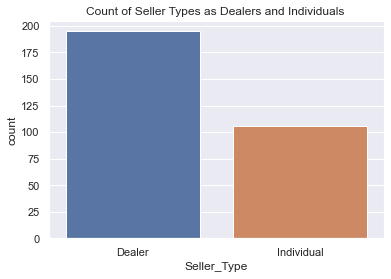

In [22]:
# Seller Type Analysis
plt.rcParams['figure.figsize'] = (6,4)
sns.countplot(x=car['Seller_Type'])
plt.title("Count of Seller Types as Dealers and Individuals ")

In [23]:
#Checking any outliners in the Dataset whether values are increasing gradually or not
car.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

Year  Selling_Price  Initial_Price     Kms_Driven  \
count   301.000000     301.000000     301.000000     301.000000   
mean   2013.627907       4.661296       7.628472   36947.205980   
std       2.891554       5.082812       8.644115   38886.883882   
min    2003.000000       0.100000       0.320000     500.000000   
25%    2012.000000       0.900000       1.200000   15000.000000   
50%    2014.000000       3.600000       6.400000   32000.000000   
75%    2016.000000       6.000000       9.900000   48767.000000   
90%    2017.000000       9.500000      14.790000   65000.000000   
95%    2017.000000      14.500000      22.780000   80000.000000   
99%    2017.000000      23.000000      35.960000  142000.000000   
max    2018.000000      35.000000      92.600000  500000.000000   

       Previous_Owners  
count       301.000000  
mean          0.043189  
std           0.247915  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
90%           0.000000  
95%           0.000000  
99%           1.000000  
max           3.000000

In [24]:
# Creating a New Feature that would define Car Age
car['Age']=2021-car['Year']
car.head()

Car_Name  Year  Selling_Price  Initial_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Previous_Owners  Age  
0      Dealer       Manual                0    7  
1      Dealer       Manual                0    8  
2      Dealer       Manual                0    4  
3      Dealer       Manual                0   10  
4      Dealer       Manual                0    7

In [25]:
#Dropping the Year Column since we have already determined the Age of vehicle
car.drop('Year',axis='columns',inplace=True)
car.head()

Car_Name  Selling_Price  Initial_Price  Kms_Driven Fuel_Type Seller_Type  \
0     ritz           3.35           5.59       27000    Petrol      Dealer   
1      sx4           4.75           9.54       43000    Diesel      Dealer   
2     ciaz           7.25           9.85        6900    Petrol      Dealer   
3  wagon r           2.85           4.15        5200    Petrol      Dealer   
4    swift           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Previous_Owners  Age  
0       Manual                0    7  
1       Manual                0    8  
2       Manual                0    4  
3       Manual                0   10  
4       Manual                0    7

In [26]:
#Dropping the Car Column for a better model
car.drop('Car_Name',axis='columns',inplace=True)
car.head()

Selling_Price  Initial_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Previous_Owners  Age  
0       Manual                0    7  
1       Manual                0    8  
2       Manual                0    4  
3       Manual                0   10  
4       Manual                0    7

In [27]:
# Analysing count of vehichle with respective ages
px.bar(x = car['Age'].value_counts().index , y =car['Age'].value_counts().values,
       color = car['Age'].value_counts().index,title = 'Age',labels = {"x":'Age',"y":"count"})

In [28]:
# Selling Price vs Vehicle Age
px.scatter(data_frame = car,x = car['Age'],y =  car['Selling_Price'],title = 'Selling_Price vs Age',color = 'Age')

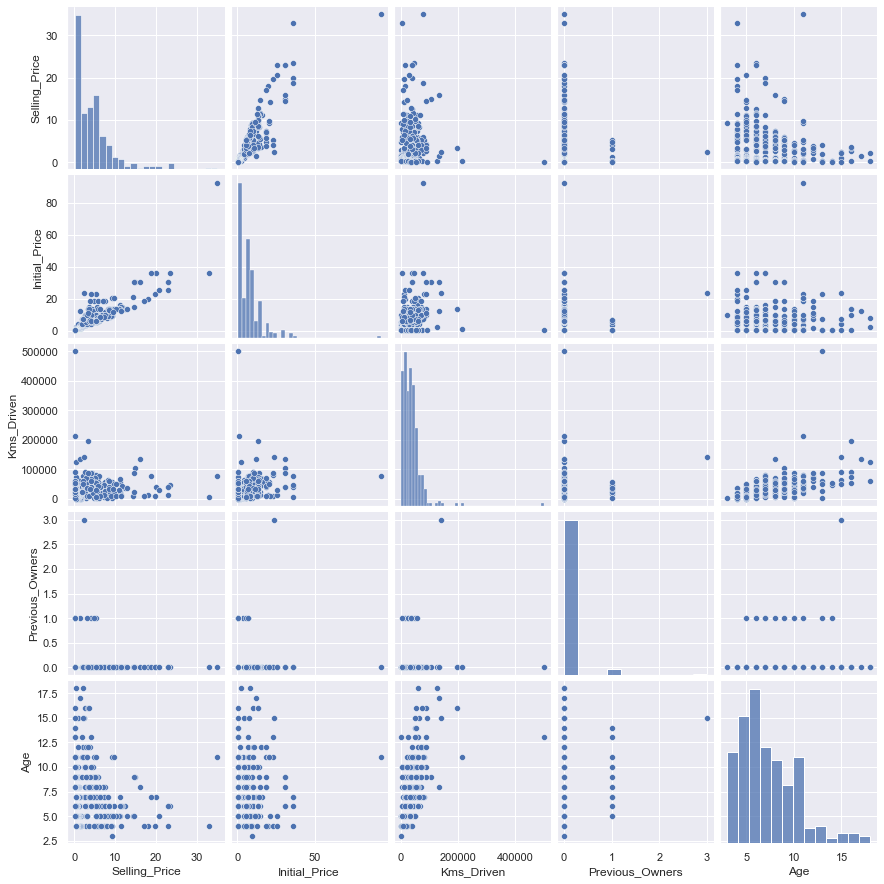

In [29]:
# Visualizing Distributon of All Features
sns.pairplot(car)

<AxesSubplot:>

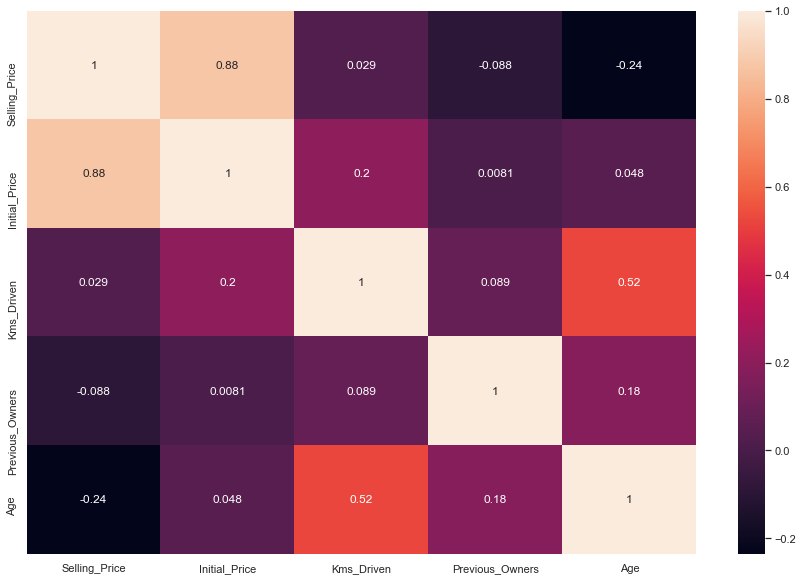

In [30]:
# Correlation Among Features
plt.figure(figsize=(15,10))
sns.heatmap(car.corr(),annot = True)

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

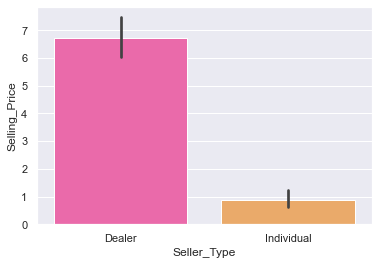

In [31]:
# Selling Price and Seller Type Comparison 
sns.barplot(x='Seller_Type',y='Selling_Price',data=car,palette='spring')

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

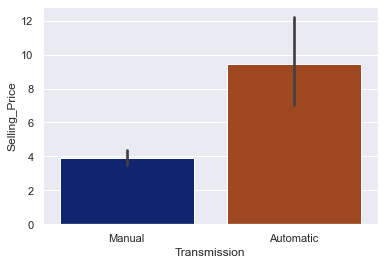

In [32]:
# Selling Price and Transmission Comparison
sns.barplot(x='Transmission',y='Selling_Price',data=car,palette='dark')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

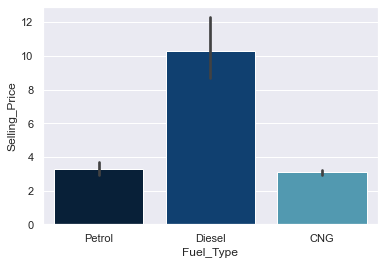

In [33]:
# Selling Price and Fuel Type Comparison
sns.barplot(x='Fuel_Type',y='Selling_Price',data=car,palette='ocean')

<AxesSubplot:xlabel='Previous_Owners', ylabel='Selling_Price'>

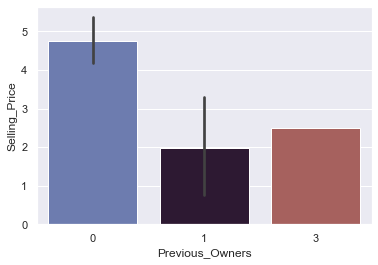

In [34]:
# Selling Price and Owner Comparison
sns.barplot(x='Previous_Owners',y='Selling_Price',data=car,palette='twilight')

<AxesSubplot:xlabel='Selling_Price', ylabel='Initial_Price'>

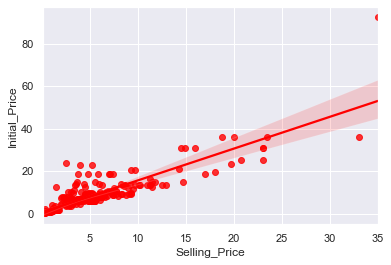

In [35]:
# Initial Price vs Selling Price
sns.regplot(x='Selling_Price',y='Initial_Price',data=car,color='red')

<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

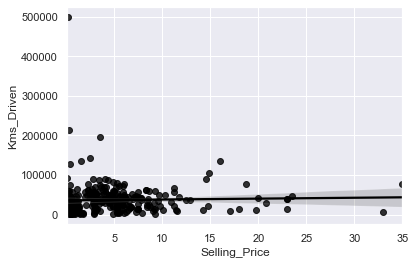

In [36]:
 # Selling Price vs Kms Driven
sns.regplot(x='Selling_Price',y='Kms_Driven',data=car,color='black')

<AxesSubplot:xlabel='Age', ylabel='Selling_Price'>

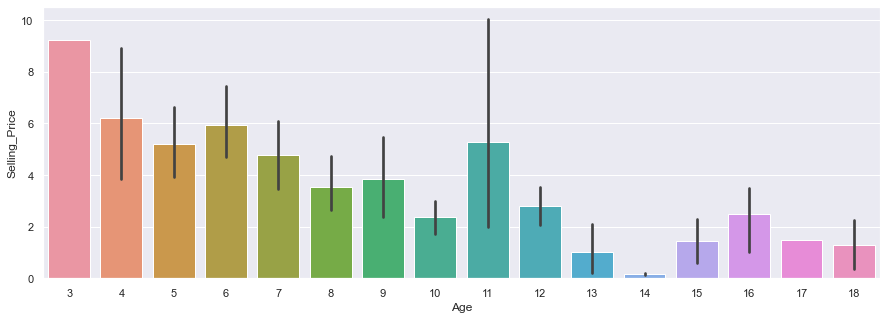

In [37]:
# Selling Price and Age Comparison
plt.figure(figsize=(15,5))
sns.barplot(x='Age',y='Selling_Price',data=car)

In [38]:
# Dealing with Categorical Columns using One Hot Encoding
final_dataset=pd.get_dummies(car,drop_first=True)
final_dataset.head()

Selling_Price  Initial_Price  Kms_Driven  Previous_Owners  Age  \
0           3.35           5.59       27000                0    7   
1           4.75           9.54       43000                0    8   
2           7.25           9.85        6900                0    4   
3           2.85           4.15        5200                0   10   
4           4.60           6.87       42450                0    7   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                 0                 1                       0   
1                 1                 0                       0   
2                 0                 1                       0   
3                 0                 1                       0   
4                 1                 0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [39]:
# Visualizing Correlation Features of final Dataset
final_dataset.corr()

Selling_Price  Initial_Price  Kms_Driven  \
Selling_Price                1.000000       0.878983    0.029187   
Initial_Price                0.878983       1.000000    0.203647   
Kms_Driven                   0.029187       0.203647    1.000000   
Previous_Owners             -0.088344       0.008057    0.089216   
Age                         -0.236141       0.047584    0.524342   
Fuel_Type_Diesel             0.552339       0.473306    0.172515   
Fuel_Type_Petrol            -0.540571      -0.465244   -0.172874   
Seller_Type_Individual      -0.550724      -0.512030   -0.101419   
Transmission_Manual         -0.367128      -0.348715   -0.162510   

                        Previous_Owners       Age  Fuel_Type_Diesel  \
Selling_Price                 -0.088344 -0.236141          0.552339   
Initial_Price                  0.008057  0.047584          0.473306   
Kms_Driven                     0.089216  0.524342          0.172515   
Previous_Owners                1.000000  0.182104         -0.053469   
Age                            0.182104  1.000000         -0.064315   
Fuel_Type_Diesel              -0.053469 -0.064315          1.000000   
Fuel_Type_Petrol               0.055687  0.059959         -0.979648   
Seller_Type_Individual         0.124269  0.039896         -0.350467   
Transmission_Manual           -0.050316 -0.000394         -0.098643   

                        Fuel_Type_Petrol  Seller_Type_Individual  \
Selling_Price                  -0.540571               -0.550724   
Initial_Price                  -0.465244               -0.512030   
Kms_Driven                     -0.172874               -0.101419   
Previous_Owners                 0.055687                0.124269   
Age                             0.059959                0.039896   
Fuel_Type_Diesel               -0.979648               -0.350467   
Fuel_Type_Petrol                1.000000                0.358321   
Seller_Type_Individual          0.358321                1.000000   
Transmission_Manual             0.091013                0.063240   

                        Transmission_Manual  
Selling_Price                     -0.367128  
Initial_Price                     -0.348715  
Kms_Driven                        -0.162510  
Previous_Owners                   -0.050316  
Age                               -0.000394  
Fuel_Type_Diesel                  -0.098643  
Fuel_Type_Petrol                   0.091013  
Seller_Type_Individual             0.063240  
Transmission_Manual                1.000000

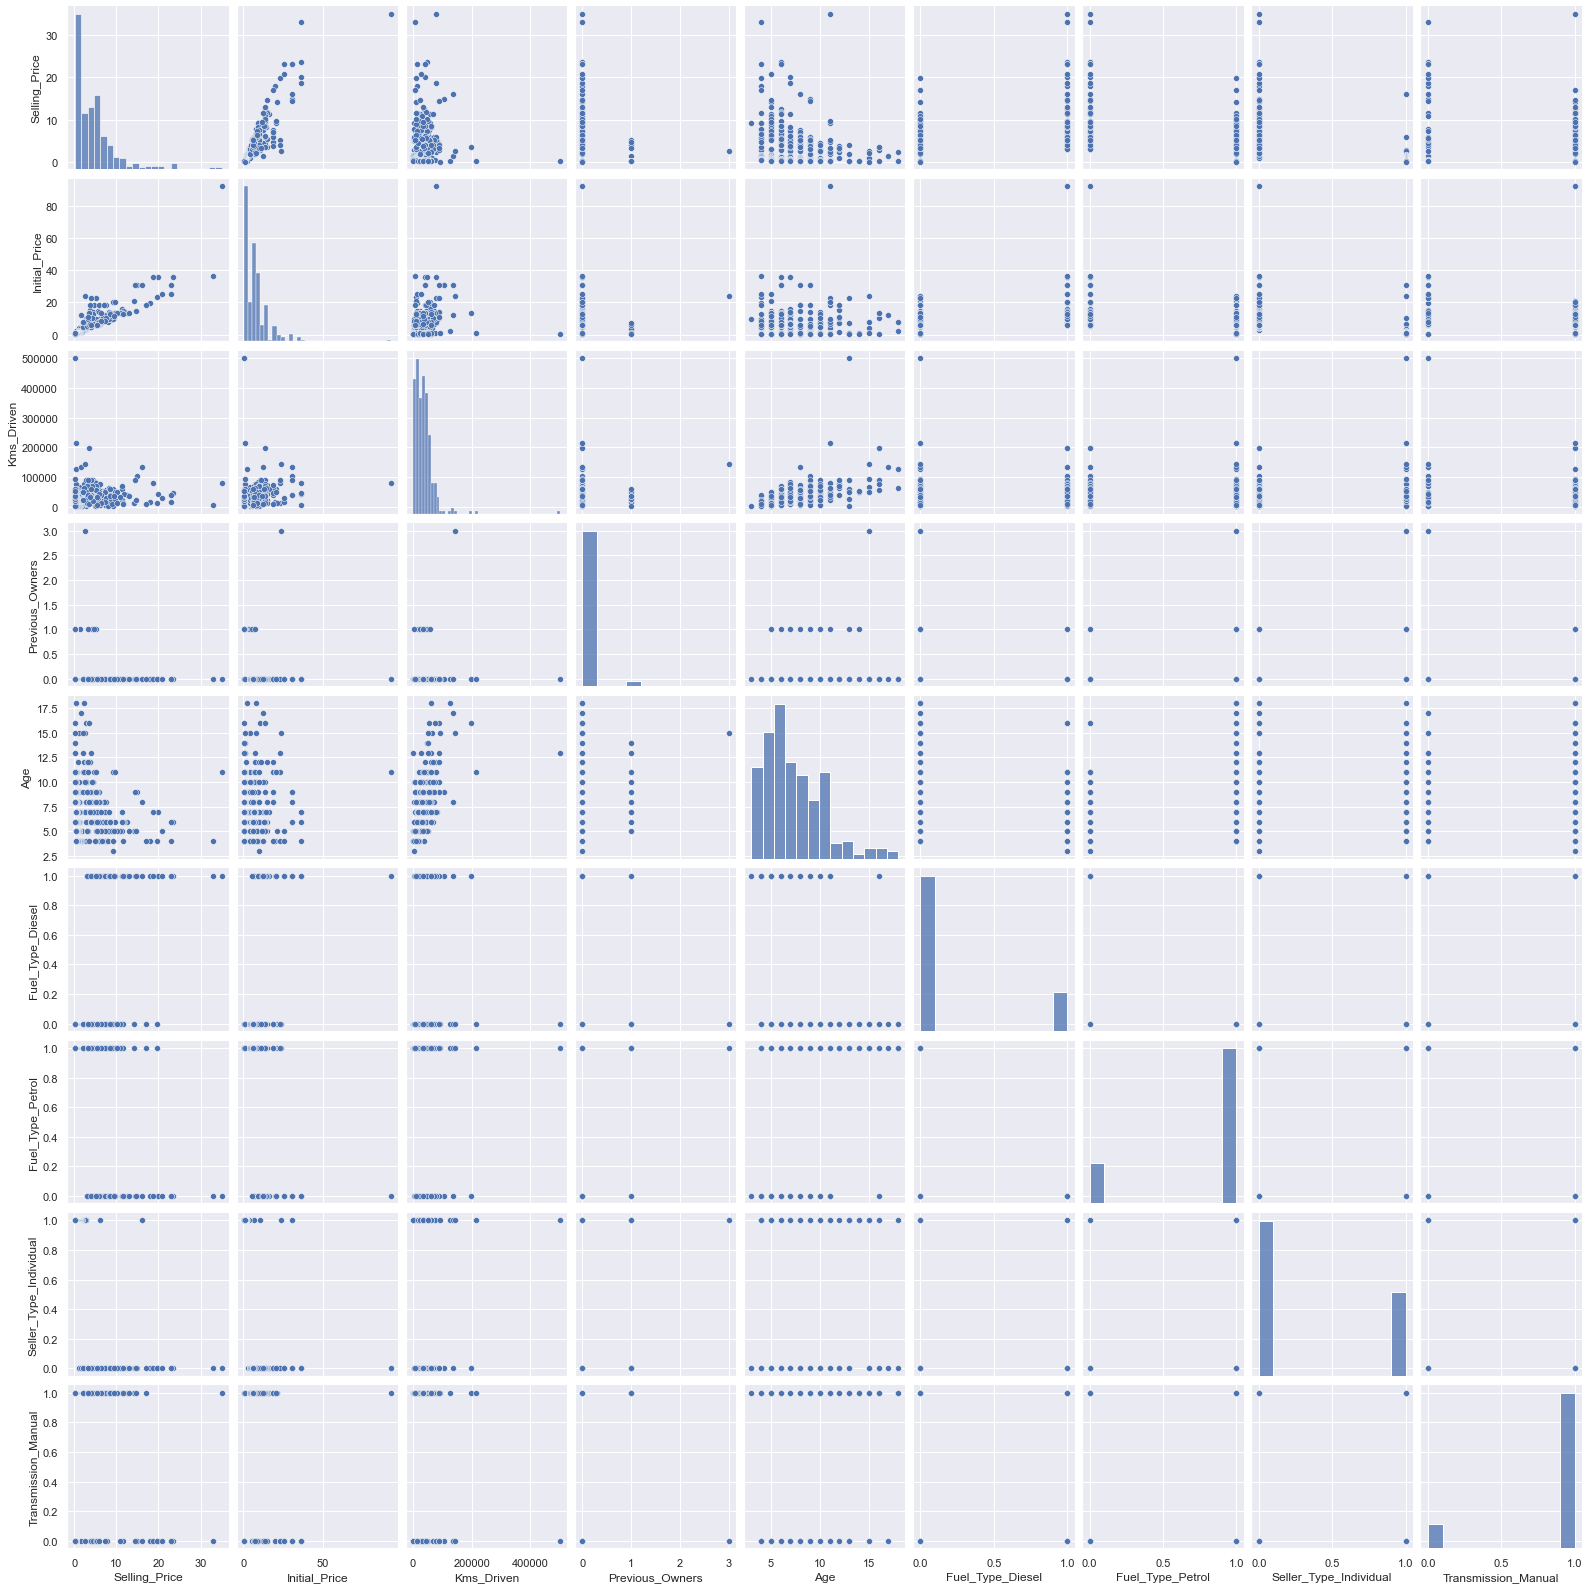

In [40]:
# Pairplot of Final Dataset
sns.pairplot(final_dataset)

<AxesSubplot:>

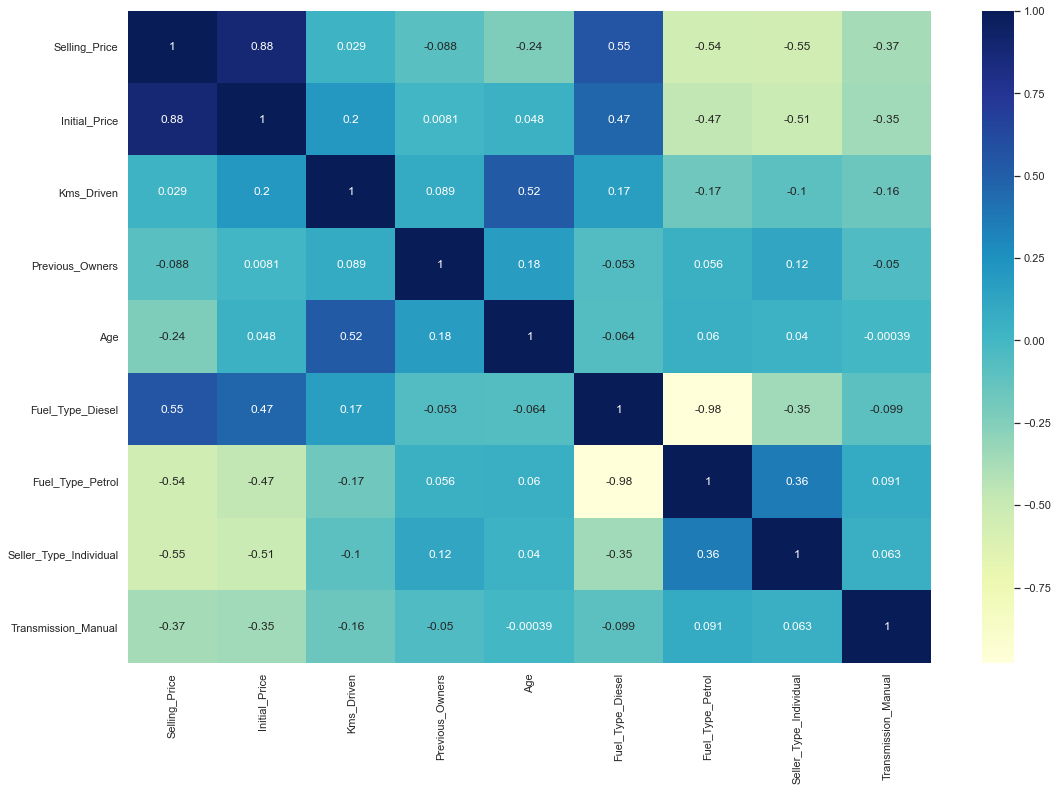

In [41]:
# Correlation Among Features of Final Dataset
plt.figure(figsize=(18,12))
sns.heatmap(final_dataset.corr(),annot = True, cmap="YlGnBu")

In [42]:
#independent and dependent features allocation
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [43]:
# All independent Features
x.head()

Initial_Price  Kms_Driven  Previous_Owners  Age  Fuel_Type_Diesel  \
0           5.59       27000                0    7                 0   
1           9.54       43000                0    8                 1   
2           9.85        6900                0    4                 0   
3           4.15        5200                0   10                 0   
4           6.87       42450                0    7                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1

In [44]:
# Dependent Feature or Output
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [45]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [46]:
# Numerical Values of Feature importance
print(model.feature_importances_)

[0.36984094 0.04218514 0.00082254 0.07785819 0.22199205 0.0092185
 0.13476697 0.14331568]


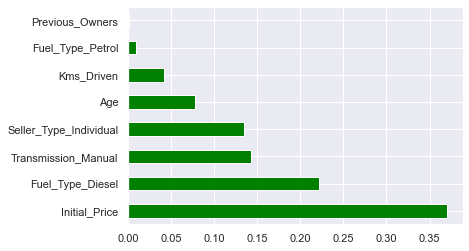

In [47]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(8).plot(kind='barh',color='green')
plt.show()

In [48]:
# Splitting into test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


LinearRegression() 

r_2 score : 0.8625260513315253 



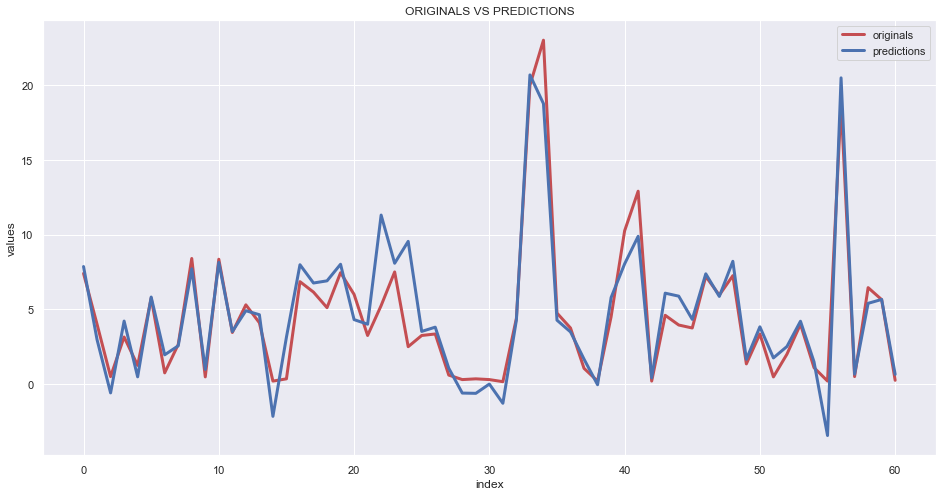

In [49]:
from sklearn.metrics import r2_score
r_2 = [] # List for r 2 score

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    
    # Appending results to Lists 
    r_2.append(R_2)

    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    
    
     # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(16,8),linewidth=3,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(16,8),linewidth=3,color="b")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()
    
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)

In [50]:
# All the predicted values with Linear Regression
print('Predictions of Linear Regression')
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)
predictions

Predictions of Linear Regression


array([ 7.86273200e+00,  2.96828691e+00, -5.90305107e-01,  4.21335952e+00,
        4.83175534e-01,  5.82053813e+00,  1.95679784e+00,  2.55809661e+00,
        7.70870833e+00,  9.78692192e-01,  8.13484343e+00,  3.51207180e+00,
        4.90669281e+00,  4.63905587e+00, -2.15886643e+00,  3.13874624e+00,
        7.98256903e+00,  6.75937638e+00,  6.90426580e+00,  8.01440587e+00,
        4.31168610e+00,  4.00336757e+00,  1.13040883e+01,  8.07939189e+00,
        9.54399823e+00,  3.52133877e+00,  3.80609808e+00,  1.06074722e+00,
       -6.01732475e-01, -6.19712043e-01,  1.32818516e-03, -1.28500691e+00,
        4.28533553e+00,  2.06769487e+01,  1.87563232e+01,  4.27292100e+00,
        3.48602852e+00,  1.66739677e+00, -4.38707073e-02,  5.78536030e+00,
        8.03940428e+00,  9.88367483e+00,  4.09684249e-01,  6.07997517e+00,
        5.88038915e+00,  4.32745252e+00,  7.37534505e+00,  5.86171335e+00,
        8.21129880e+00,  1.65455816e+00,  3.83033706e+00,  1.75047060e+00,
        2.51406796e+00,  

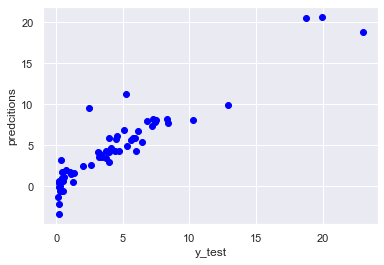

In [51]:
# Prediction Chart
plt.xlabel('y_test')
plt.ylabel('predcitions')
plt.scatter(y_test,predictions,color='blue')

In [52]:
# Regression Evaluation Metrics
from sklearn import metrics
print('Regression Evaluation Metrics of Linear Regression')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared  Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Regression Evaluation Metrics of Linear Regression
Mean Absolute Error: 1.0998575552990955
Mean Squared  Error: 2.982384861859749
Root Mean Squared Error: 1.7269582687082363


0.8413182976963037
0.001
Lasso(alpha=0.001, normalize=True) 

r_2 score : 0.8659918147666655 



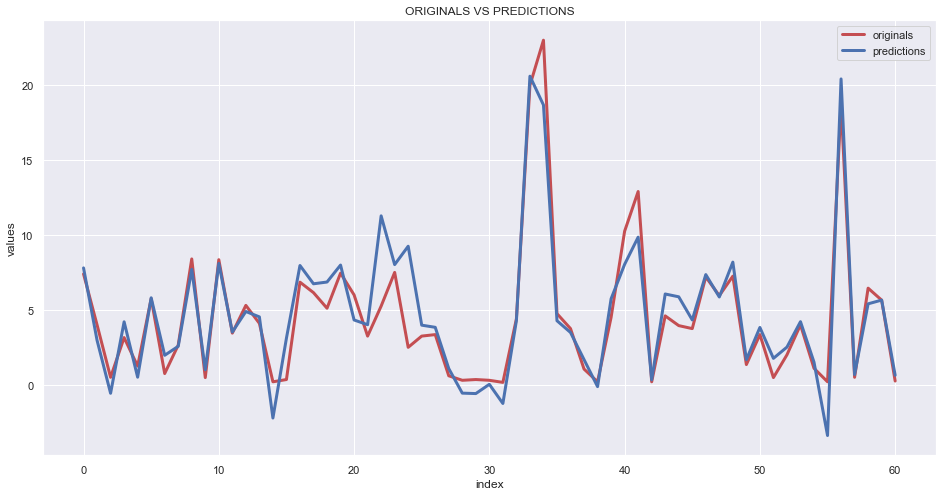

In [53]:
# Implementing Lasso Regression Model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) # applied the best estimator
model(ls,x_train,y_train,x_test,y_test)

In [54]:
# All the predicted values with Lasso Algorithm
print('Predictions of Lasso Regression')
ls.fit(x_train,y_train)
predictions=ls.predict(x_test)
predictions

Predictions of Lasso Regression


array([ 7.80329635,  2.96952304, -0.5663887 ,  4.2030719 ,  0.50692904,
        5.80613905,  1.96886891,  2.56779123,  7.70377935,  1.00249646,
        8.10046894,  3.51968447,  4.89175173,  4.53255791, -2.21873482,
        3.11404814,  7.96263346,  6.74099391,  6.85855927,  7.99197846,
        4.32641947,  4.01080152, 11.27561511,  8.02104422,  9.24876715,
        3.9795944 ,  3.83554272,  1.08184167, -0.55703197, -0.5859339 ,
        0.03174506, -1.2479368 ,  4.28172259, 20.59533709, 18.67502732,
        4.27550032,  3.49010004,  1.68202678, -0.12257876,  5.73914092,
        8.03914687,  9.85417261,  0.32873174,  6.05993512,  5.87225796,
        4.32711373,  7.35618131,  5.85959527,  8.18729843,  1.67710114,
        3.82806905,  1.76485304,  2.51456298,  4.21354659,  1.50948219,
       -3.3867227 , 20.41437626,  0.6818508 ,  5.40371762,  5.65227399,
        0.6331197 ])

Text(0.5, 1.0, 'Prediction Chart of Lasso Regression')

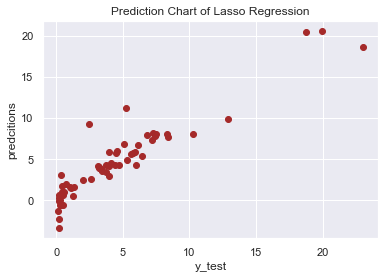

In [55]:
# Prediction Chart of Lasso Algorithm
plt.xlabel('y_test')
plt.ylabel('predcitions')
plt.scatter(y_test,predictions,color='brown')
plt.title('Prediction Chart of Lasso Regression')

In [56]:
# Regression Evaluation Metrics
print('Regression Evaluation Metrics of Lasso Regression')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared  Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Regression Evaluation Metrics of Lasso Regression
Mean Absolute Error: 1.0934873952604165
Mean Squared  Error: 2.9071979591493617
Root Mean Squared Error: 1.7050507204037544


In [57]:
# Ridge Regression Model
from sklearn.linear_model import Ridge

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(x_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

0.841227704017515
0.001


Ridge(alpha=0.01, normalize=True) 

r_2 score : 0.8634059881080344 



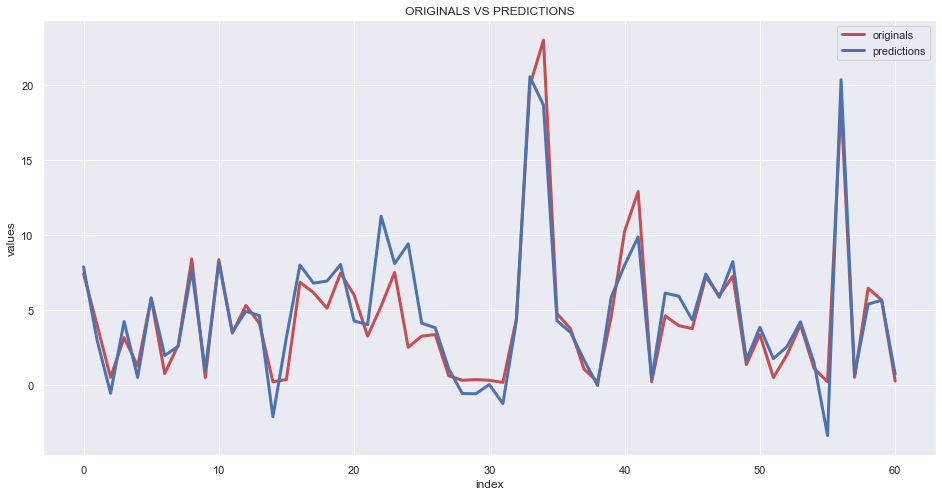

In [58]:
rd = Ridge(alpha = 0.01, normalize = True) # applied the best estimator
model(rd,x_train,y_train,x_test,y_test)

In [59]:
# All the predicted values using Ridge Regression
print('Predictions of Ridge Regression')
rd.fit(x_train,y_train)
predictions=rd.predict(x_test)
predictions

Predictions of Ridge Regression


array([ 7.87493907e+00,  2.99007148e+00, -5.64334439e-01,  4.22123815e+00,
        4.93425577e-01,  5.80586578e+00,  1.94996732e+00,  2.58252113e+00,
        7.66157139e+00,  9.81876770e-01,  8.14884598e+00,  3.52328888e+00,
        4.90580917e+00,  4.61849151e+00, -2.13622322e+00,  3.16874778e+00,
        7.99333054e+00,  6.78760853e+00,  6.92523497e+00,  8.02560465e+00,
        4.26828846e+00,  4.00656441e+00,  1.12515562e+01,  8.08770330e+00,
        9.40362391e+00,  4.11466669e+00,  3.80394323e+00,  1.06369054e+00,
       -5.83028526e-01, -5.96931559e-01,  1.64038681e-02, -1.25360670e+00,
        4.28944590e+00,  2.05597515e+01,  1.86682538e+01,  4.27471617e+00,
        3.49872362e+00,  1.66377581e+00, -4.51417513e-02,  5.82342683e+00,
        7.98576894e+00,  9.86945420e+00,  4.02607131e-01,  6.11930563e+00,
        5.91834662e+00,  4.32949911e+00,  7.39477754e+00,  5.84145134e+00,
        8.22010194e+00,  1.64799423e+00,  3.84060684e+00,  1.74590614e+00,
        2.54276898e+00,  

Text(0.5, 1.0, 'Prediction Chart of Ridge Regression')

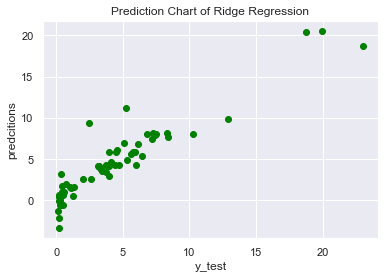

In [60]:
# Prediction Chart of Ridge Regression
plt.xlabel('y_test')
plt.ylabel('predcitions')
plt.scatter(y_test,predictions,color='green')
plt.title('Prediction Chart of Ridge Regression')

In [61]:
# Regression Evaluation Metrics
print('Regression Evaluation Metrics of Ridge Regression')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared  Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Regression Evaluation Metrics of Ridge Regression
Mean Absolute Error: 1.1080941933985602
Mean Squared  Error: 2.96329535328687
Root Mean Squared Error: 1.7214224796042574


BayesianRidge() 

r_2 score : 0.8695367611314831 



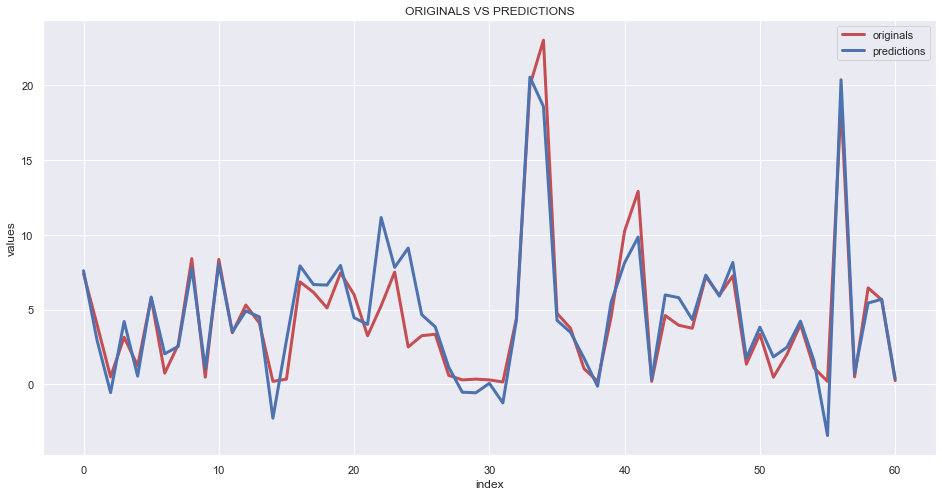

In [62]:
#BayesianRidge Regression
from sklearn import linear_model
br=linear_model.BayesianRidge()
model(br,x_train,y_train,x_test,y_test)

In [63]:
# All the predicted values using BayesianRidge Regression
print('Predictions of BayesianRidge Regression')
br.fit(x_train,y_train)
predictions=br.predict(x_test)
predictions

Predictions of BayesianRidge Regression


array([ 7.59564489,  2.94601511, -0.54879035,  4.20342975,  0.55104116,
        5.83978093,  2.04345034,  2.53791783,  7.7809861 ,  1.06090209,
        8.0548718 ,  3.51239038,  4.90361636,  4.50792855, -2.2635576 ,
        2.93484733,  7.92230494,  6.67194325,  6.63475921,  7.95054483,
        4.45332501,  4.00842426, 11.15289328,  7.81698692,  9.11007145,
        4.65881671,  3.84289988,  1.140061  , -0.52295134, -0.56189408,
        0.0703192 , -1.23760407,  4.28658286, 20.52983432, 18.57045713,
        4.28271042,  3.47788498,  1.75042295, -0.12650873,  5.49101877,
        8.12860735,  9.84950925,  0.33472684,  5.97697518,  5.793564  ,
        4.33339894,  7.30158194,  5.89927564,  8.14895218,  1.74907184,
        3.82232836,  1.83667456,  2.47897506,  4.22606843,  1.57579407,
       -3.41873384, 20.35568831,  0.7284671 ,  5.43568256,  5.68643931,
        0.39677465])

Text(0.5, 1.0, 'Prediction Chart of BayesianRidge Regression')

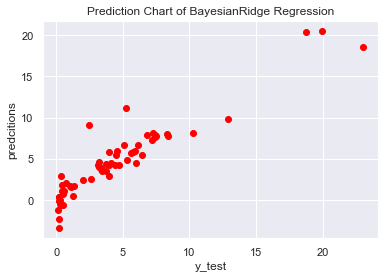

In [64]:
# Prediction Chart of BayesianRidge Regression
plt.xlabel('y_test')
plt.ylabel('predcitions')
plt.scatter(y_test,predictions,color='red')
plt.title('Prediction Chart of BayesianRidge Regression')

In [65]:
# Regression Evaluation Metrics
print('Regression Evaluation Metrics of BayesianRidge Regression')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared  Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Regression Evaluation Metrics of BayesianRidge Regression
Mean Absolute Error: 1.0750176074334108
Mean Squared  Error: 2.830293247551729
Root Mean Squared Error: 1.6823475406561301


RandomForestRegressor() 

r_2 score : 0.8576392803233095 



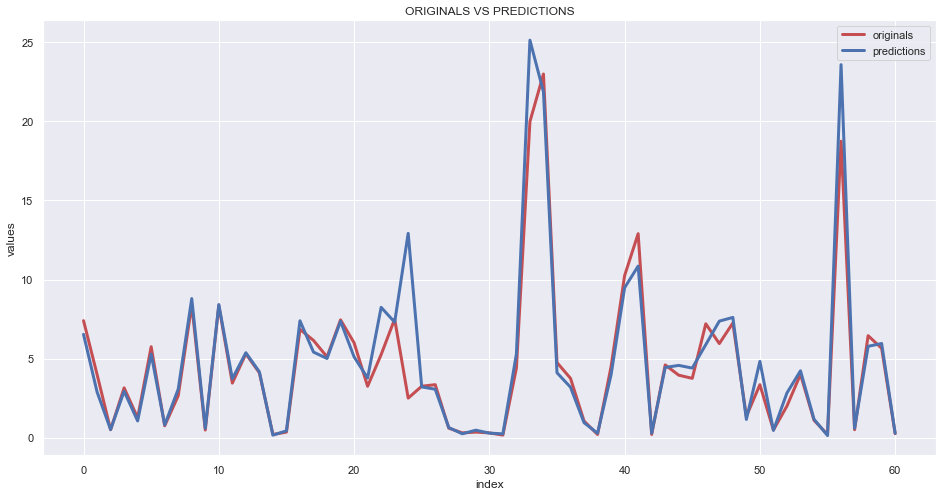

In [66]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model(rf,x_train,y_train,x_test,y_test)

In [67]:
# All the predicted values using RandomForest Regression
print('Predictions of RandomForest Regression')
rf.fit(x_train,y_train)
predictions=rf.predict(x_test)
predictions

Predictions of RandomForest Regression


array([ 6.538 ,  2.9335,  0.4924,  2.957 ,  1.0737,  5.177 ,  0.8217,
        3.1265,  8.8435,  0.5897,  8.5073,  3.6495,  5.365 ,  4.0295,
        0.1663,  0.4131,  7.4535,  5.4125,  4.977 ,  7.4685,  4.98  ,
        3.9335,  9.6643,  7.4017, 12.0438,  3.3055,  3.0428,  0.6351,
        0.2227,  0.4662,  0.2675,  0.2275,  5.269 , 24.304 , 21.333 ,
        4.012 ,  3.196 ,  0.9548,  0.2623,  3.8085,  9.3229, 10.7222,
        0.2756,  4.4365,  4.551 ,  4.485 ,  6.055 ,  7.4545,  7.6275,
        1.1534,  4.782 ,  0.4546,  2.857 ,  4.3225,  1.167 ,  0.1347,
       21.9595,  0.5642,  5.944 ,  5.943 ,  0.2597])

Text(0.5, 1.0, 'Prediction Chart of RandomForest Regression')

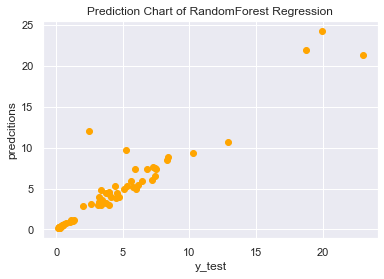

In [68]:
# Prediction Chart of RandomForest Regression
plt.xlabel('y_test')
plt.ylabel('predcitions')
plt.scatter(y_test,predictions,color='orange')
plt.title('Prediction Chart of RandomForest Regression')

In [69]:
# Regression Evaluation Metrics
print('Regression Evaluation Metrics of RandomForest Regression')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared  Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Regression Evaluation Metrics of RandomForest Regression
Mean Absolute Error: 0.7583409836065579
Mean Squared  Error: 2.6763766622950826
Root Mean Squared Error: 1.6359635271897361


DecisionTreeRegressor() 

r_2 score : 0.9544468030861166 



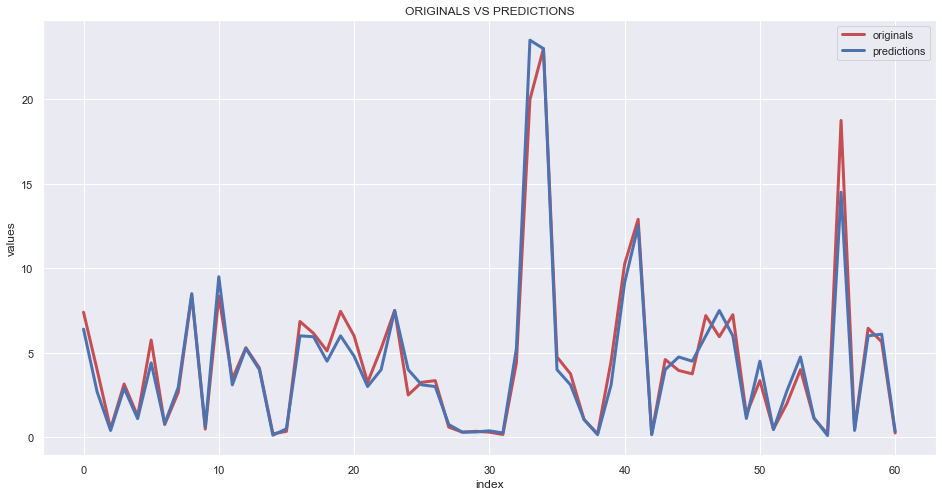

In [70]:
# DecisionTree Regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,x_train,y_train,x_test,y_test)

In [71]:
# All the predicted values using DecisionTree Regression
print('Predictions of DecisionTree Regression')
dtr.fit(x_train,y_train)
predictions=dtr.predict(x_test)
predictions

Predictions of DecisionTree Regression


array([ 6.4 ,  2.75,  0.4 ,  2.9 ,  1.1 ,  4.4 ,  0.8 ,  2.95,  8.5 ,
        0.6 ,  9.5 ,  3.5 ,  5.5 ,  4.  ,  0.12,  0.5 ,  7.5 ,  5.95,
        4.5 ,  7.5 ,  4.8 ,  3.  ,  9.25,  6.  ,  4.  ,  3.1 ,  2.75,
        0.51,  0.3 ,  0.31,  0.38,  0.25,  5.25, 23.  , 23.  ,  4.  ,
        3.1 ,  1.05,  0.15,  3.5 ,  9.15, 12.5 ,  0.15,  4.75,  4.75,
        5.3 ,  6.  ,  8.25,  7.5 ,  1.11,  4.5 ,  0.48,  2.7 ,  4.  ,
        1.15,  0.12, 23.5 ,  0.4 ,  8.25,  6.1 ,  0.35])

Text(0.5, 1.0, 'Prediction Chart of DecisionTree Regression')

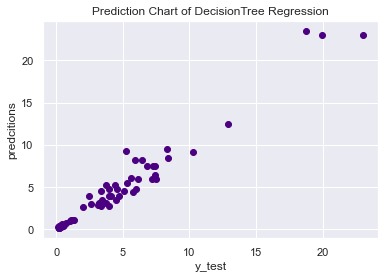

In [72]:
# Prediction Chart of DecisionTree Regression
plt.xlabel('y_test')
plt.ylabel('predcitions')
plt.scatter(y_test,predictions,color='indigo')
plt.title('Prediction Chart of DecisionTree Regression')

In [73]:
# Regression Evaluation Metrics
print('Regression Evaluation Metrics of DecisionTree Regression')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared  Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Regression Evaluation Metrics of DecisionTree Regression
Mean Absolute Error: 0.6711475409836066
Mean Squared  Error: 1.313954098360656
Root Mean Squared Error: 1.1462783686176128


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 

r_2 score : 0.8958982213688829 



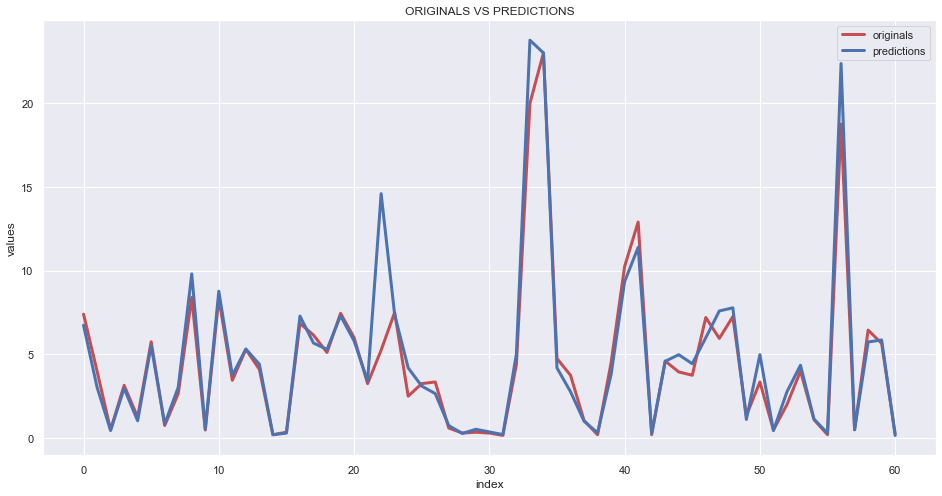

In [74]:
# XGBoost Regression
import xgboost
xg=xgboost.XGBRegressor()
model(xg,x_train,y_train,x_test,y_test)

In [75]:
# All the predicted values using xgboost Regression
print('Predictions of xgboost Regression')
xg.fit(x_train,y_train)
predictions=xg.predict(x_test)
predictions

Predictions of xgboost Regression


array([ 6.744687  ,  3.0358202 ,  0.44835633,  2.966554  ,  1.0317972 ,
        5.5188875 ,  0.8449166 ,  3.0329745 ,  9.8058605 ,  0.55166554,
        8.76983   ,  3.748195  ,  5.3187594 ,  4.4081483 ,  0.19860283,
        0.29714757,  7.2839913 ,  5.6723776 ,  5.2935467 ,  7.301268  ,
        5.802477  ,  3.41401   , 14.593114  ,  7.368342  ,  4.1915083 ,
        3.1041362 ,  2.6552887 ,  0.7451501 ,  0.27760857,  0.52493966,
        0.3682658 ,  0.21023205,  5.022433  , 23.756361  , 22.996128  ,
        4.1861296 ,  2.766396  ,  1.0100813 ,  0.31641728,  3.798356  ,
        9.342903  , 11.388462  ,  0.2877966 ,  4.584815  ,  4.9779854 ,
        4.4388924 ,  5.992328  ,  7.590609  ,  7.7756534 ,  1.1144545 ,
        4.979831  ,  0.4480115 ,  2.7637596 ,  4.3495674 ,  1.1331065 ,
        0.28807366, 22.364542  ,  0.4926225 ,  5.737423  ,  5.8578596 ,
        0.15166226], dtype=float32)

Text(0.5, 1.0, 'Prediction Chart of sgboost Regression')

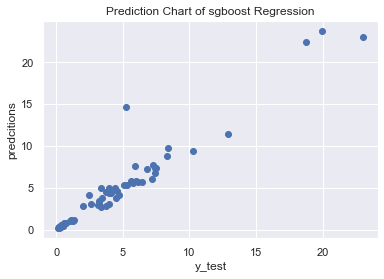

In [76]:
# Prediction Chart of xgboost Regression
plt.xlabel('y_test')
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)
plt.title('Prediction Chart of sgboost Regression')

In [77]:
# Regression Evaluation Metrics
print('Regression Evaluation Metrics of xgboost Regression')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared  Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Regression Evaluation Metrics of xgboost Regression
Mean Absolute Error: 0.6822110073879116
Mean Squared  Error: 2.2584029315316756
Root Mean Squared Error: 1.5027983668914722


GradientBoostingRegressor() 

r_2 score : 0.9355132427572888 



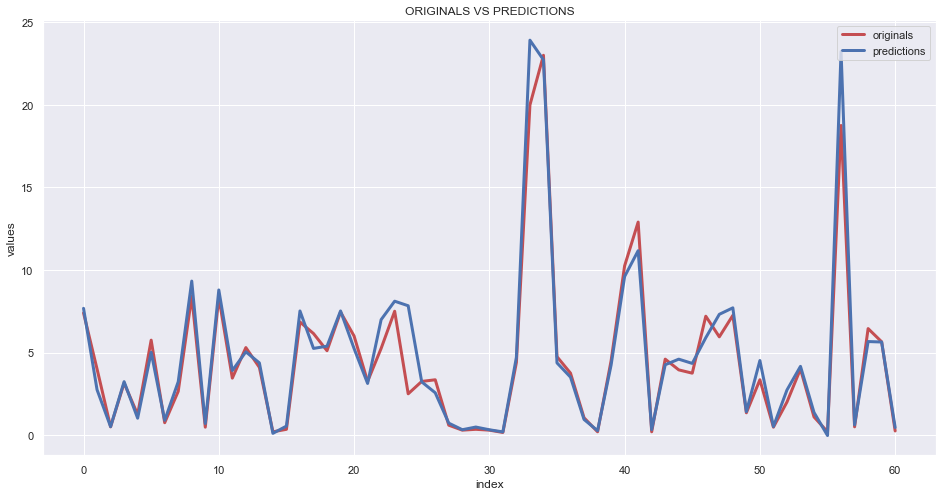

In [78]:
#GradientBoosting Regression
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
model(gb,x_train,y_train,x_test,y_test)

In [79]:
# All the predicted values using GradientBoosting Regression
print('Predictions of GradientBoosting Regression')
gb.fit(x_train,y_train)
predictions=gb.predict(x_test)
predictions

Predictions of GradientBoosting Regression


array([7.67752500e+00, 2.74430073e+00, 5.11125748e-01, 3.23544044e+00,
       1.02354106e+00, 5.01475674e+00, 8.95246997e-01, 3.23097924e+00,
       9.32679355e+00, 6.98225840e-01, 8.78903130e+00, 3.90893678e+00,
       5.04236159e+00, 4.37234659e+00, 1.06882371e-01, 5.45545387e-01,
       7.51763488e+00, 5.24912775e+00, 5.38399546e+00, 7.51763488e+00,
       5.22190479e+00, 3.12755423e+00, 6.99467033e+00, 8.10867377e+00,
       7.87579023e+00, 3.22331119e+00, 2.56232286e+00, 7.24640435e-01,
       3.12209744e-01, 4.87836119e-01, 3.22985043e-01, 1.93756028e-01,
       4.71766276e+00, 2.39139689e+01, 2.27249481e+01, 4.37234659e+00,
       3.50867229e+00, 9.46717159e-01, 2.66364191e-01, 4.24046901e+00,
       9.60302502e+00, 1.11657984e+01, 3.27178818e-01, 4.26004710e+00,
       4.59849246e+00, 4.34131349e+00, 5.89795161e+00, 7.31400362e+00,
       7.70619419e+00, 1.41731564e+00, 4.51584496e+00, 5.19730239e-01,
       2.72882307e+00, 4.16432126e+00, 1.37248349e+00, 1.22417254e-02,
      

Text(0.5, 1.0, 'Prediction Chart of GradientBoosting Regression')

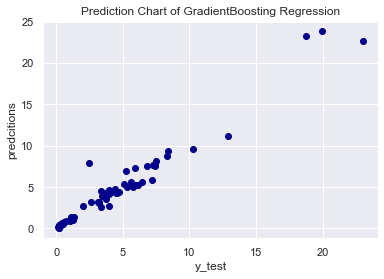

In [80]:
# Prediction Chart of GradientBoosting Regression
plt.xlabel('y_test')
plt.ylabel('predcitions')
plt.scatter(y_test,predictions,color='darkblue')
plt.title('Prediction Chart of GradientBoosting Regression')

In [82]:
# Regression Evaluation Metrics
print('Regression Evaluation Metrics of GradientBoosting Regression')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared  Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Regression Evaluation Metrics of GradientBoosting Regression
Mean Absolute Error: 0.637846014327301
Mean Squared  Error: 1.411104724405201
Root Mean Squared Error: 1.1878992905146468


In [83]:
import pickle
# open a file, where you ant to store the data
file = open('decision_tree_regressor.pkl', 'wb')

# dump information to that file
pickle.dump(dtr, file)